# Context: Predict Heart Failure

Cardiovascular diseases (CVDs) are the number 1 cause of death globally, taking an estimated 17.9 million lives each year, which accounts for 31% of all deaths worldwide. Four out of 5CVD deaths are due to heart attacks and strokes, and one-third of these deaths occur prematurely in people under 70 years of age. Heart failure is a common event caused by CVDs and this dataset contains 11 features that can be used to predict a possible heart disease.

# Inspiration
People with cardiovascular disease or who are at high cardiovascular risk (due to the presence of one or more risk factors such as hypertension, diabetes, hyperlipidaemia or already established disease) need early detection and management wherein a machine learning model can be of great help.

In [1]:
from pathlib import Path
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
NB_DIR = %pwd
NB_DIR = Path(NB_DIR)

In [5]:
dataset = pd.read_csv(NB_DIR/'data'/'heart.csv') #add the train.csv file in the data folder 

In [6]:
dataset.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [7]:
dataset.Age.min(), dataset.Age.max()

(28, 77)

In [8]:
dataset['is_ExerciseAngina'] = False
dataset['is_FastingBS'] = False
dataset.loc[dataset.ExerciseAngina == 'Y', 'is_ExerciseAngina'] = True
dataset.loc[dataset.ExerciseAngina == 1, 'is_FastingBS'] = True
dataset.drop(['ExerciseAngina', 'FastingBS'], axis=1, inplace=True)

In [9]:
dataset.HeartDisease.value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(dataset, test_size=0.15, stratify=dataset.HeartDisease.tolist(), shuffle=True)

In [11]:
train.shape, test.shape

((780, 12), (138, 12))

# Setting up the environment in PyCaret

In [12]:
from pycaret.classification import *

In [13]:
dataset.shape

(918, 12)

In [15]:
# initialize setup
data = setup(data=train, test_data=test, target ='HeartDisease', train_size=0.99, fold_shuffle=True, fold = 10, normalize=True)

,Description,Value
0,session_id,4398
1,Target,HeartDisease
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(780, 12)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


# Select models

In [16]:
best_models = compare_models(n_select=4)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
knn,K Neighbors Classifier,0.8603,0.8935,0.9143,0.8469,0.8790,0.7142,0.7179,0.0810
catboost,CatBoost Classifier,0.8603,0.9261,0.8865,0.8656,0.8755,0.7163,0.7176,1.5930
gbc,Gradient Boosting Classifier,0.8590,0.9144,0.8912,0.8596,0.8749,0.7134,0.7145,0.0170
xgboost,Extreme Gradient Boosting,0.8551,0.9115,0.8749,0.8661,0.8700,0.7063,0.7073,0.3450
rf,Random Forest Classifier,0.8538,0.9189,0.8866,0.8561,0.8706,0.7027,0.7043,0.0420
et,Extra Trees Classifier,0.8513,0.9162,0.8840,0.8538,0.8682,0.6975,0.6991,0.0380
lightgbm,Light Gradient Boosting Machine,0.8487,0.9083,0.8680,0.8615,0.8643,0.6933,0.6944,0.5360
lr,Logistic Regression,0.8436,0.9167,0.8749,0.8487,0.8609,0.6822,0.6842,0.1850
ridge,Ridge Classifier,0.8423,0.0000,0.8749,0.8468,0.8600,0.6795,0.6815,0.0060
lda,Linear Discriminant Analysis,0.8423,0.9161,0.8749,0.8468,0.8600,0.6795,0.6815,0.0040


In [ ]:
best_models

# Hyperparameter tuning

In [102]:
#tuned_best_model = tune_model(best_models[0])

In [42]:
blender_specific = blend_models(estimator_list = best_models[:2], method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8590,0.9349,0.8837,0.8636,0.8736,0.7142,0.7144
1,0.9359,0.9648,0.9767,0.9130,0.9438,0.8694,0.8721
2,0.8333,0.8811,0.9070,0.8125,0.8571,0.6586,0.6643
3,0.8590,0.9555,0.9302,0.8333,0.8791,0.7111,0.7173
4,0.8718,0.9389,0.8605,0.9024,0.8810,0.7422,0.7432
5,0.8462,0.8990,0.8605,0.8605,0.8605,0.6890,0.6890
6,0.8077,0.8598,0.8837,0.7917,0.8352,0.6061,0.6114
7,0.8590,0.9176,0.9302,0.8333,0.8791,0.7111,0.7173
8,0.8974,0.9385,0.9545,0.8750,0.9130,0.7886,0.7931
9,0.8718,0.9037,0.9091,0.8696,0.8889,0.7376,0.7386


tuned_best_model# Combining models

# Analyze results

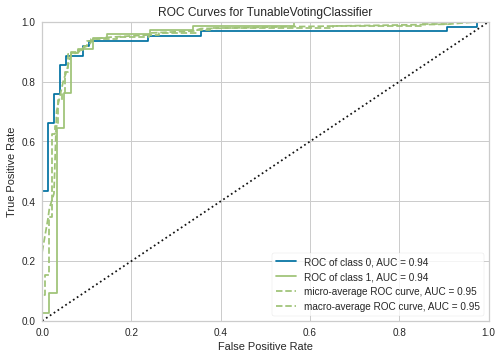

In [38]:
data = plot_model(blender_specific) #Get an understanding of the data 

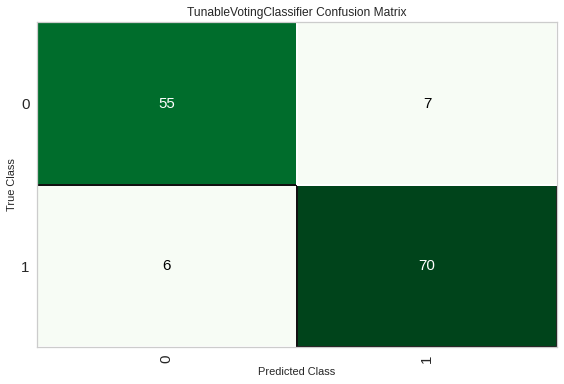

In [39]:
plot_model(blender_specific, plot = 'confusion_matrix') #look at the outliers

In [40]:
#Feature importance scores can be used to select which features to ignore (lowest scores) and which ones to keep (highest scores)
#plot_model(blender_specific[0], plot='feature')

In [43]:
prediction_holdout = predict_model(blender_specific)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.9130,0.9429,0.9342,0.9103,0.9221,0.8238,0.8241


## Train final model

In [45]:
final_model = finalize_model(blender_specific)

# Export model

In [46]:
save_model(final_model,'final_model_heart_failure')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[],
                                       target='HeartDisease',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric...
                  TunableVotingClassifier(estimators=[('knn',
                                                       KNeighborsClassifier(algorithm='auto',
                                                                            lea